In [91]:
%matplotlib notebook
import pandas as pd
import numpy as np
from sklearn import neighbors
import csv
from sklearn import datasets

# User Study to Evaluate the KnnDecisionBoundariesVisualizer in YellowBrick


In [92]:
#load data from the 
data = pd.read_csv('./merged_adm_sat_data.csv')
frame = pd.DataFrame(data)

#### Function that loads college data

In [93]:
def load_adm_sat_school_data(return_X_y=False):

    """Load and return a subset of College Scorecard dataset (classification) from https://collegescorecard.ed.gov/data/.
    The method assumes the data file is the current folder where this pythong program is located.
    """
    
    with open("./merged_adm_sat_data.csv") as csv_file:
        data_file = csv.reader(csv_file)
        temp = next(data_file)
        n_samples = int(temp[0])
        n_features = int(temp[1])
        target_names = np.array(temp[2:])
    
    df = pd.read_csv("./merged_adm_sat_data.csv", sep=",", usecols=(0, 1, 2, 3), skiprows=0)
    data = np.empty((n_samples, n_features), dtype=int)
    target = np.ma.empty((n_samples,), dtype=int)

    for index, row in df.iterrows():
        data[index] = np.asarray([df.iloc[index][0], df.iloc[index][1], df.iloc[index][2]], dtype=np.float)
        target[index] = np.asarray(df.iloc[index][3], dtype=np.int)

    feature_names = np.array(['ACT_AVG','SAT_AVG','GRAD_DEBT','REGION'])

    if return_X_y:
        return data, target

    return datasets.base.Bunch(data=data, target=target,
                 target_names=target_names,
                 DESCR='School Data set',
                 feature_names=feature_names)

#### Function that renders a Matplotlib Scatter plot

In [94]:
def show_plot(model=neighbors.KNeighborsClassifier, n_neighbors=3, h=0.2):
    """
    A simple implementation of the scatter plot to measure performance differnece between YB & MatPlotLib
    """
    # Create color maps
    cmap_light = plt.get_cmap('Pastel1')
    cmap_bold = plt.get_cmap('Dark2')

    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot also the training points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (n_neighbors, weights))

    plt.show()

#### Loading school data and mapping to X & y

In [95]:
school = load_adm_sat_school_data()
X = school.data[:, :2]  # we only take the first two features.
y = school.target

In [96]:
import yellowbrick as yb
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

<IPython.core.display.Javascript object>


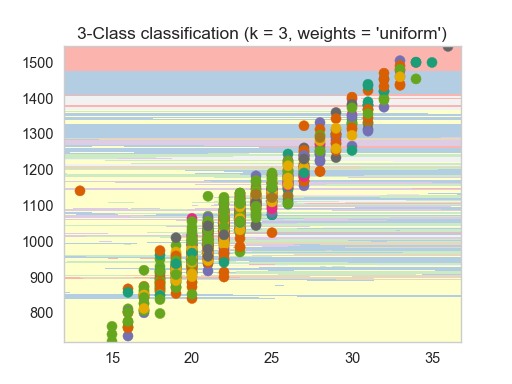

<IPython.core.display.Javascript object>

In [99]:
model = neighbors.KNeighborsClassifier(10)
model.fit(X,y)
show_plot(model,3)

In [100]:
import sys
sys.path.append('../../yellowbrick/')
import neighbors.py as neighbors
import mixins.py as mixins
from yellowbrick.neighbors import KnnDecisionBoundariesVisualizer

ModuleNotFoundError: No module named 'yellowbrick.mixins'

In [ ]:
viz = KnnDecisionBoundariesVisualizer(model)
visualizer.fit_draw_poof(X, y))